# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smartcab does not move during the simulation because at the top of the window, it says "No action taken". The driving agent receives a positive reward if the action is legal and appropriate. If not, it receives negative reward. For instance, it receives a positive reward (1.58 or other positive values) if the agent idles at a red light. On the contrary, it receives a negative reward (-5.24 or other negative values) if the agent does not move at an intersection on a green light with no oncoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- **In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.**   
Three flags can be passed to create the Environment:
    + verbose   
        + By setting to True, the program displays additional information about the agent's environment (action, reward, a color of lights). The default value is false. 
    + num_dummies   
        + It sets a number of dummy agents in the environment. The default value is 100. 
    + grid_size   
        + It sets a number of intersections in the environment, by passing grid_size = (columns, rows). The default value is (8, 6). 


- **In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?**   
The `act()` function is called when an agent performs an action. The `act()` function considers and performs an action if it is legal. Also, the function calculates the reward that the agent receives. 


- **In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?**

    + `'render_text()'`: This render function is for non-GUI (on the Terminal window).
    + `'render()'`: This render function is for GUI (on the PyGame window). 


- **In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?**   
The `'next_waypoint()` function considers East-West direction first, then the North-South direction. 


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


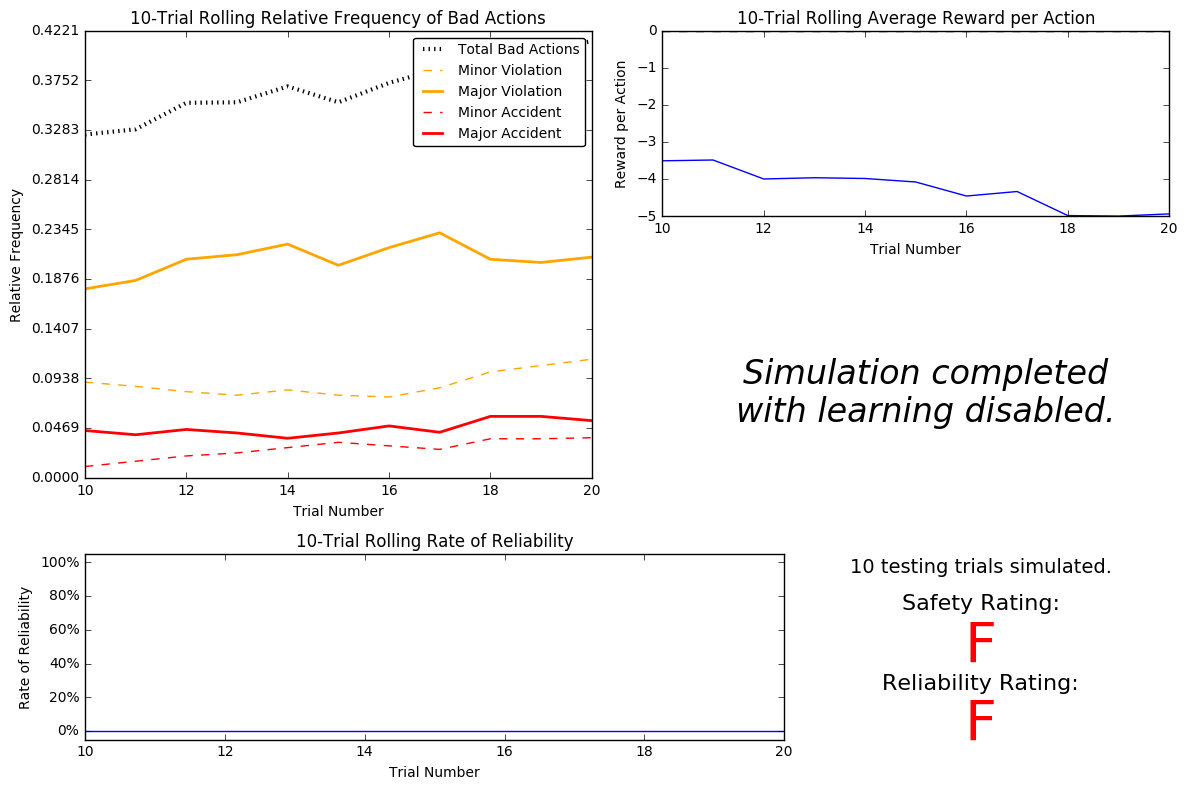

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

## Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

+ **Graph: 10-Trial Rolling Relative Frequency of Bad Actions**    
The total bad actions are about 35% (range from 32% to 42%). The bad actions include 30% of violations (about 20% of major violations and about 5% of minor violations), and 10% of accidents (about 4% of major accidents and about 1% of minor accidents). 


+ **Graph: 10-Trial Rolling Rate of Reliability**    
The rate of reliability indicates 0% across the trials. An agent would be considered unreliable if it frequently does not reach the destination in time. Since the agent is moving randomly, this rate of reliably makes sense. 


+ **Graph: 10-Trial Rolling Average Reward per Action**   
The agent is receiving negative rewards across the trial. The average rewards are between -3.5 and -5.0. In the graph, the rewards tend to be heavily by increasing the number of trials. 


+ **Overall analysis**   
The Smartcab is not ready, and it cannot be considered as safe and reliable because both the safety and reliability ratings are F. The Smatcab causes at least one major accidents  and does not reach the destination in time. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

* **Variable used: 'waypoint', 'light', 'left', and 'oncoming'**     
for safety, 'light', 'left', and 'oncoming' are very important input data to drive safely. Also, for efficiency, 'waypoint' is essential because it indicates the direction to the destination. By following it, the Smartcab should reach the destination in time. 


* **Validate not used: 'right' and 'deadline'**      
Vehicles to the Smarcab's right do not affect the movement of the agent (U.S. Right-of-Way rules). The feature, 'deadline', does not affect the safety and efficiency of the Smartcab because it indicates the number of remaining steps before running out the time. In the other words, this feature is independent of the Smartcab's action. 


* **Definition: U.S. Right-of-Way rules**
    + On a green light, a left turn is permitted if there is no oncoming traffic making a right turn or coming straight through the intersection.
    + On a red light, a right turn is permitted if no oncoming traffic is approaching from your left through the intersection. 


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Each features would have following possible state values: 
+ 'waypoint': [None, 'forward', 'left', 'right'] 
+ 'inputs', which is the sensor data from the Smartcab. It includes
    + 'light': ['green', 'red']   
    + 'left': [None, 'forward', 'left', 'right']   
    + 'oncoming': [None, 'forward', 'left', 'right']   

By calculating the combinations of features, the size of state space would be $4 \times 2 \times 4 \times 4 = 128$. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

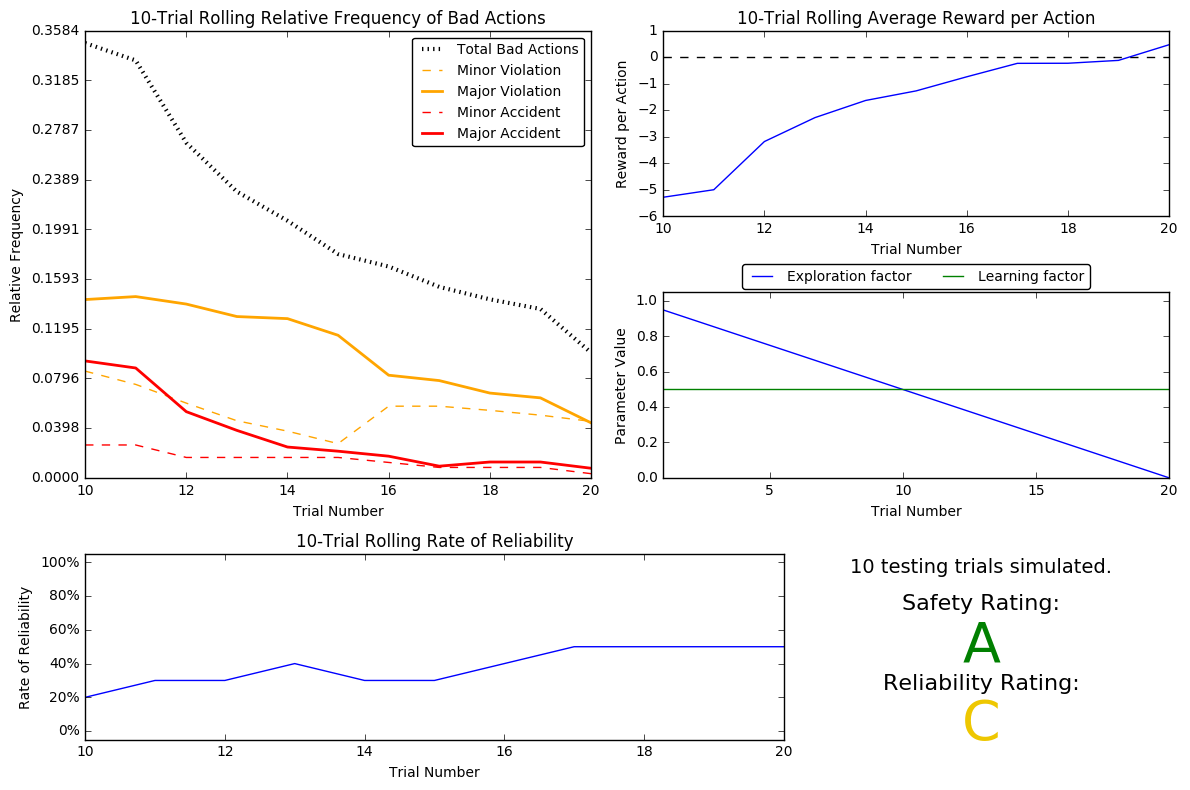

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

+ **Graph: 10-Trial Rolling Relative Frequency of Bad Actions**
The starting points of the lines are very similar to the graph with the basic driving agent. However, the default Q-Learning agent is learning as the number of training increased. All the lines of the graph, except minor violation, are rapidly decreasing across the trials. At the 20th trial, the total bad actions decrease to about 12% (about 20% decreased, compared with bad actions with the basic agent). 


+ **Graph: 10-Trial Rolling Rate of Reliability**
The rate of reliability is increasing from 20% to 50%, which is a good improvement. However, it still needs to be improved to be considered reliable. 


+ **Graph: 10-Trial Rolling Average Reward per Action**
This graph is also different from the basic driving agent. The average reward per action is rapidly increasing across the trials. 


+ **Graph: Exploration factor and Learning factor**
Both explration factor and leanring factor are correctly represented in the parameters pannel. Since $ \epsilon_{t+1} = \epsilon_{t} - 0.05$, the learining factor is a linear function and $\epsilon$ is toward 0. Exploration factor is a constant where the alpha value is a default value (alpha = 0.5). 


+ **Overall analysis** 
    + Overall, the default Q-Learning agent is learning quite well. As the number of trials increased, the number of bad actions, including the violations and accidents, is decreasing. At the same time, the average reward is increasing. The safety rating is A, which is a great improvement compared to the initial driving agent (it was F). 
    + The reliability rating for the default Q-Learning agent is C. Compared to the initial agent, it improved (it was F), but it still should be improved to be concerned relibale. 
    + Since the size of state space is 128, the training trails might be necessary as many as the size of state space to gain A+ on both safety rating and reliability rating. 
    


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

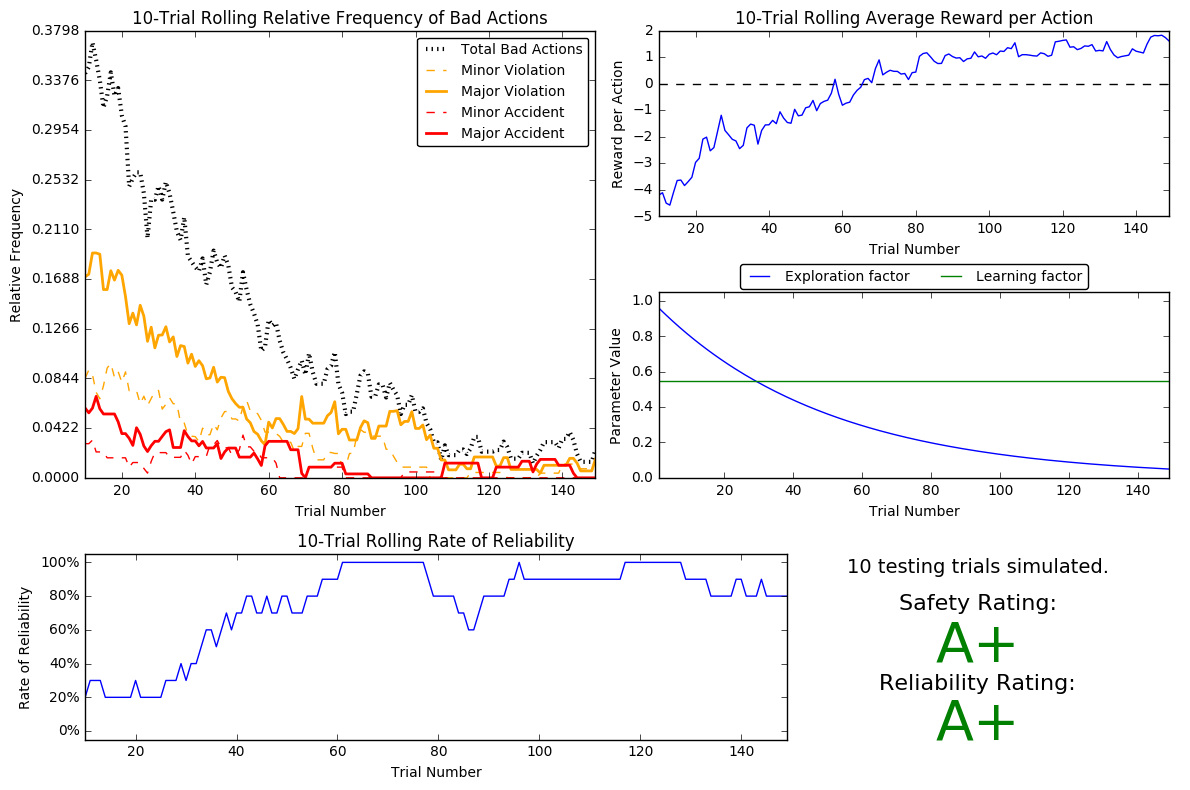

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

+ **Decaying function and number of training trials**    
The decay function for epsilon (the exploration factor) is $ \epsilon = e^{-0.020t} $ where t is a number of trials. This function takes about 150 trials before beginning testing. The idea of this decay function comes from the mathematical modeling of a learning curve (Wikipedia).


+ **Epsilon-tolerance and alpha (learning rate)**    
Epsilon-tolerance is set to 0.05, which is the default value. The alpha value is set to 0.55. Based on the experiments (tolerance = 0.01, 0.03, 0.07, 0.09, and alpha = 0.5, 0.55, 0.6, 0.7, 0.8, 0.9), the values tolerance = 0.05 and alpha = 0.55 provide the best model with A+ on both safety rating and reliability rating. 


+ **Graph analysis** 
    + **Graph: 10-Trial Rolling Relative Frequency of Bad Actions**    
    By comparing to the default Q-leaning, the bad actions are decreasing exponentially. In particular, near the end of trials, the bad actions, including all kinds of violations and accidents, decrease to almost 0. 
    
    + **Graph: 10-Trial Rolling Rate of Reliability**     
    The rate of reliability is increasing rapidly, especially until about the 60th trial. Then, the rate is between 60% and 100%, but most of the time, it is about between 80% and 100%. Since the maximum rate of reliability for the default Q-Learner is 50%, this is a great improvement. 
    
    + **Graph: 10-Trial Rolling Average Reward per Action**     
    The average reward is exponentially increasing across the trials. In particular, after the 70th trial, all rewards are positive, and it reaches about 1.8. 
    
    + **Graph: Exploration factor and Learning factor**      
    The line of exploration factor is the curve as expected since the decay function is an Exponential decay function and learning rate is constant. 
    
    
    
+ **Overall analysis**   
    + Both safety rating and reliability rating are A+, meaning that the agent always chooses the correct action and reaches the destination in time for 100% of trips. 
    + The Smartcab is probably not ready to be used in the real world, but I'm satisfied with the result. 
    




Reference: [Wikipedia: Learning curve](https://en.wikipedia.org/wiki/Learning_curve)



### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

States are defined by (waypoint, input_light, input_left, input_oncoming). Following are a few examples of optimal policy: 

* **Case I:** 
    * State: (forward, green, None, left)
    * Optimal policy: go forward 
    * This is a legal action and optimal policy because the waypoint is forward. 
    
    
* **Case II:**  
    * State: (right, red, None, None) 
    * Optimal policy: turn right 
    * This is a legal action (U.S. Right-of-Way rules) and optimal policy because the waypoint is right. 


* **Case III:** 
    * State: (left, green, None, None)
    * Optimal policy: turn left 
    * This is a legal action (U.S. Right-of-Way rules) and optimal policy because the waypoint is left. 
    

In the `'sim_improved-learning.txt'` text file, especially the first half of the policies are not correct for the given state because obviously the Q-earner is in the process of learning. Toward the end of training, the policies are getting correct for the given states as the agent starts mastering the U.S. right-of-way traffic laws. 

Here is an example of s state and all state-action rewards recorded: 


('forward', 'red', None, 'right')
 -- None : 1.83
 -- forward : 0.00
 -- right : -0.01
 -- left : -21.70
 
 
 The policy for this state is None or stop. This policy is correct because simply the agent is following the traffic rule where cars stop at red lights. 
 
 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

* The Smartcab needs to make a decision based on the current state.    
The Smartcab only knows the information about the lights or other cars in the current intersection, and the state is not global. The waypoint gives a direction to the destination; however, it does not provide how many steps are necessary to reach the destination from the current state. 


* The environment is dynamic.   
Because the environment and destination change every trial, setting a fixed reward does not give advantages. 


These two characteristics about the project are reasons that the use of future rewards in the Q-Learning algorithm does not work. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.